In [66]:
import sys
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from scipy import interpolate
from scipy import fftpack as scfft

In [35]:
path = "/home/ke/Desktop/FSL_work/SH/SH_006_20161221_edits.txt"
#txt_files = [file for file in os.listdir(path) if file.endswith('.txt')]
# print(txt_files)
#path = "../Austin_data/Austin_endtidal/BOLD_CO2_only_edit.txt"
# path = '/home/asophonsri/Dropbox/HMRI/Data/Austin_endtidal/BOLD_O2_only_edit.txt'
print(path)

/home/ke/Desktop/FSL_work/SH/SH_006_20161221_edits.txt


/home/ke/Desktop/FSL_work/SH/SH_006_20161221_edits.txt
       Time       O2      CO2
0  0.000000  21.5149  36.1578
1  0.000533  21.4844  36.2067
2  0.001067  21.4233  36.2457
3  0.001600  21.5149  36.2994
4  0.002133  21.5454  36.3495


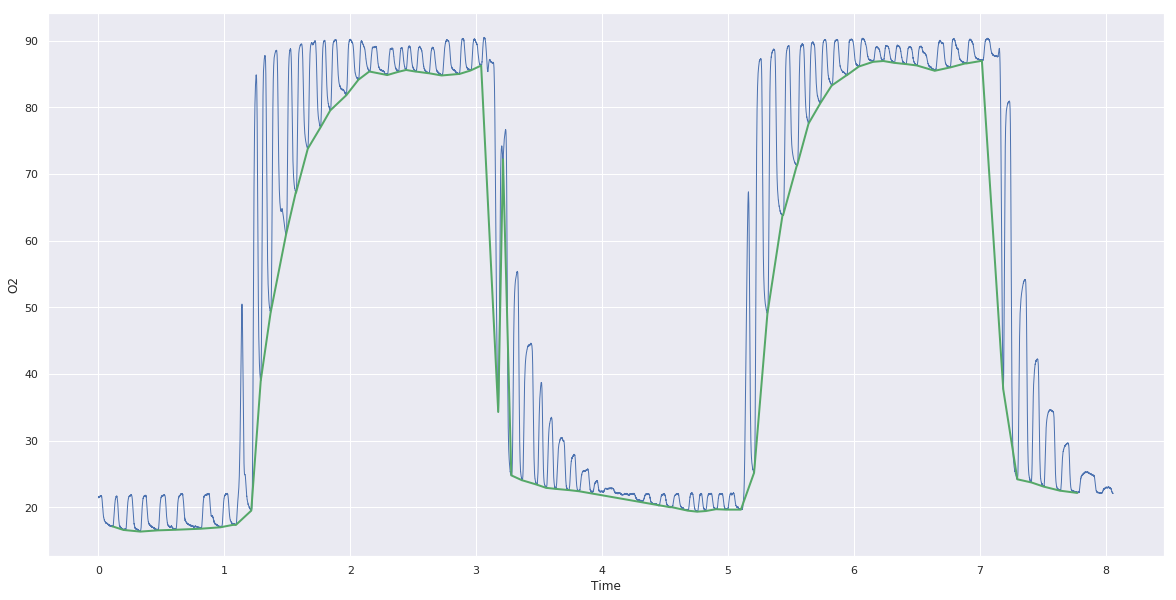

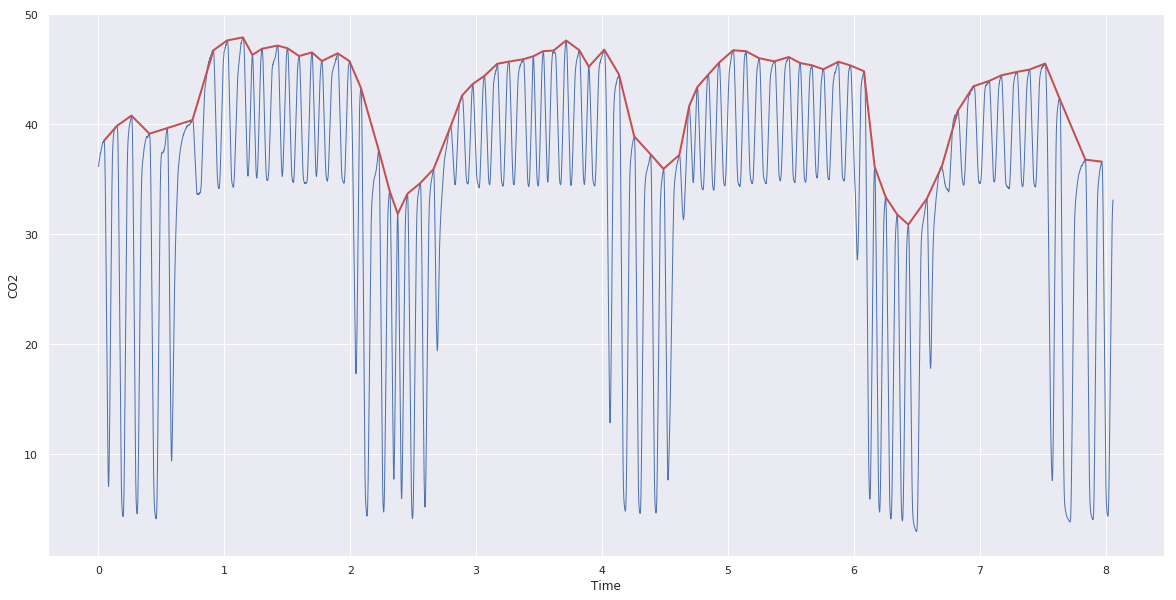

         Time       O2       CO2
206  0.109867  17.1204  36.19140
216  0.115200  17.1204  38.24950
374  0.199467  16.6016   4.85718
377  0.201067  16.6016   5.44678
623  0.332267  16.3574  25.80870
          Time       O2      CO2
84    0.044800  18.1580  38.5059
276   0.147200  21.6675  39.8474
492   0.262400  21.8506  40.7843
759   0.404800  17.4561  39.1357
1024  0.546133  17.8223  39.6436


In [56]:
sns.set(rc={'figure.figsize':(20,10)})

# for file in txt_files:
#     f_path = path+file
if path:
    f_path = path
    df = pd.read_csv(f_path, sep='\t|,', names=['Time', 'O2', 'CO2', 'thrw', 'away'], usecols=['Time', 'O2', 'CO2'], index_col=False, engine='python')
    print(f_path)
    
    print(df.head())
#    print(df.CO2.apply(lambda x:x*-1).head())
#    print(df.CO2.head())
    
#    sns.scatterplot(x='Time', y='O2', data=df, linewidth=0, s=10)
    low_O2, _ = signal.find_peaks(df.O2.apply(lambda x: x*-1), prominence=2)
    sns.lineplot(x='Time', y='O2', data=df, linewidth=1, color='b')
#    print(low_O2)
#    print()
#    print(index)
    sns.lineplot(x='Time', y='O2', data=df.iloc[low_O2], linewidth=2, color='g')
    plt.show()

#    sns.scatterplot(x='Time', y='CO2', data=df, linewidth=0, s=10)
    sns.lineplot(x='Time', y='CO2', data=df, linewidth=1, color='b')
    high_CO2, _ = signal.find_peaks(df.CO2, prominence=2)
#    print(high_CO2)
#    print()
#    print(index)
    sns.lineplot(x='Time', y='CO2', data=df.iloc[high_CO2], linewidth=2, color='r')
    plt.show()
    
#    print(len(low_O2))
#    print(len(high_CO2))
    
#    print(df.iloc[low_O2].head())
#    print(df.iloc[low_O2].O2.head())
#    print(df.iloc[high_CO2].head())
#    print(df.iloc[high_CO2].CO2.head())
    
    O2_df = df.iloc[low_O2]
    CO2_df = df.iloc[high_CO2]
    
    print(O2_df.head())
    print(CO2_df.head())
    
#    os.mkdir(path+file[:len(file)-4])
#    save_path = path+file[:len(file)-4]+'/O2_contrast.txt'
#    O2_df.to_csv(path_or_buf=save_path, sep='\t', header=False, index=False)
#    save_path = path+file[:len(file)-4]+'/CO2_contrast.txt'
#    CO2_df.to_csv(path_or_buf=save_path, sep='\t', header=False, index=False)
    
    
#    N = len(df)
#    T = 1.5 # given through json file (TR)
#    T = df.Time[1] # time between each data point
#    O2_x = np.linspace(0.0, N*T, N)
    
#    O2_xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
#    O2_yf = fft(df.O2)
#    O2_w = signal.blackman(N)
#    O2_ywf = fft(df.O2 * O2_w)
    
#     plt.semilogx(O2_xf[1:N//2], 2.0/N * np.abs(O2_yf[1:N//2]), '-b')
#     plt.semilogx(O2_xf[1:N//2], 2.0/N * np.abs(O2_ywf[1:N//2]), '-r')
#    plt.legend(['FFT', 'FFT w. window'])
#    plt.show()
    
#     sns.scatterplot(x='Time', y='O2', data=df, linewidth=0, s=10)
#     high_O2 = signal.find_peaks(df.O2, prominence=2)
#     sns.lineplot(x='Time', y='O2', data=df.iloc[high_O2[0]], linewidth=4, color='r')
#     low_O2 = signal.find_peaks(df.O2.apply(lambda x: x*-1), prominence=2)
#     sns.lineplot(x='Time', y='O2', data=df.iloc[low_O2[0]], linewidth=4, color='g')
#     plt.show()
    
    

In [37]:
b_path = "/home/ke/Desktop/FSL_work/SH_info/SH006/BOLD/meants_corrected.txt"

       Meants
0  541.795317
1  541.919653
2  541.999076
3  542.333126
4  540.874703
172


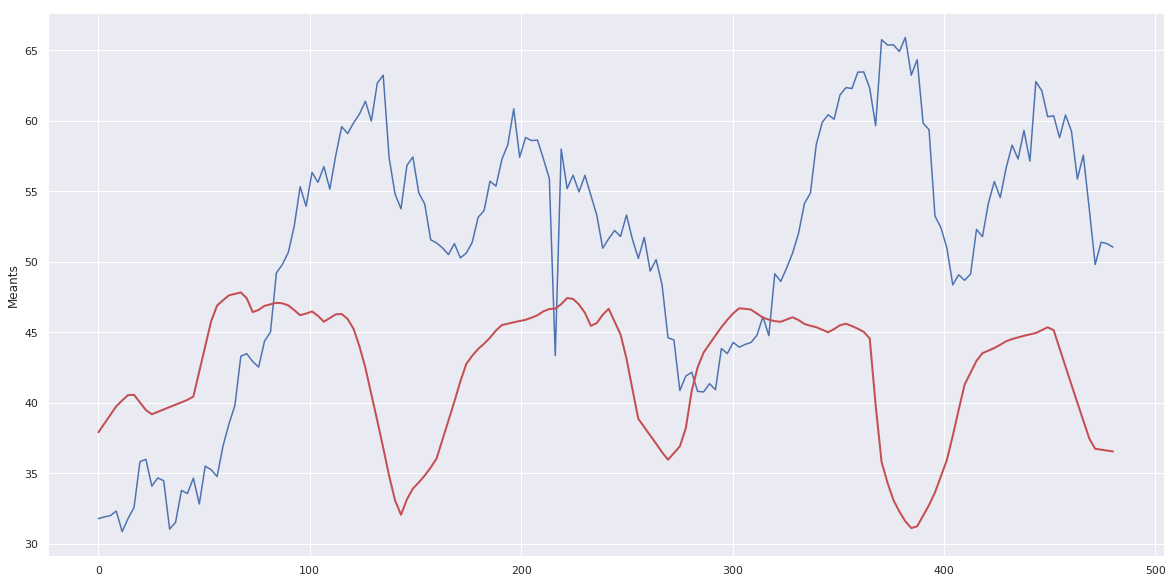

In [81]:
data_series = pd.read_csv(b_path, index_col=False, names=['Meants'], skiprows=3)
print(data.head())
sns.lineplot(x=np.linspace(0,480, len(data_series)), y=data_series.Meants-510)

print(len(data_series))

CO2_fxn = interpolate.interp1d(CO2_df.Time*60, CO2_df.CO2, fill_value='extrapolate')
et_CO2 = CO2_fxn(np.linspace(0,480, len(data_series)))
sns.lineplot(x=np.linspace(0,480, len(data_series)), y=et_CO2, linewidth=2, color='r')
plt.show()

In [72]:
powCO2 = scfft.fft(et_CO2)
realCO2 = powCO2.real
compCO2 = powCO2.imag

powBOLD = scfft.fft(data_series.Meants)
realBOLD = powBOLD.real
compBOLD = powBOLD.imag

preinvCO2 = powCO2
preinvBOLD = realBOLD + 1j*compCO2

shiftedBOLD = ifft(preinvBOLD)

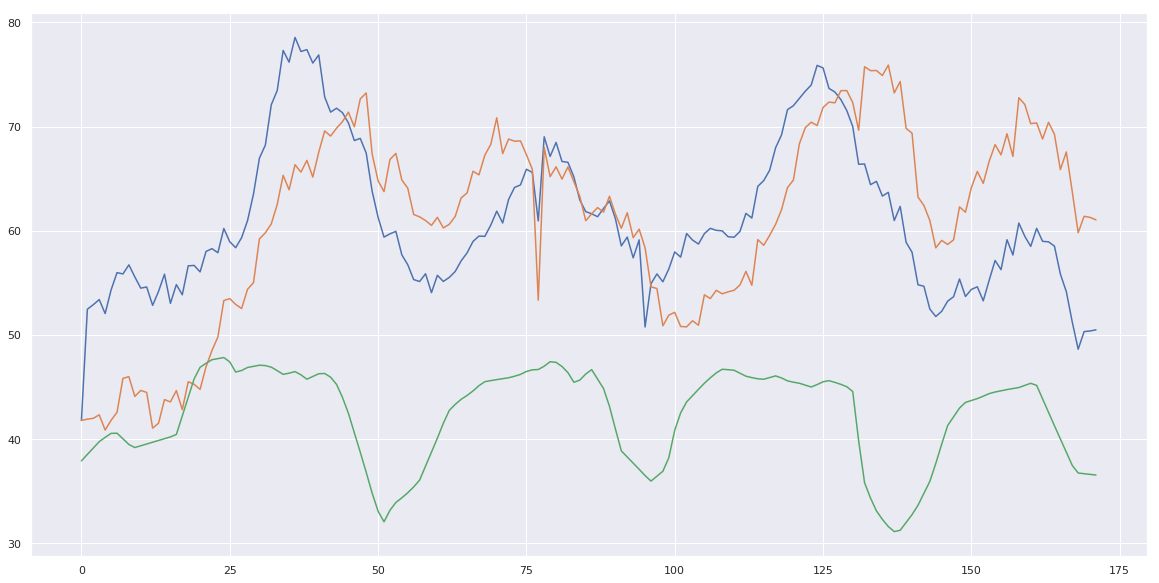

In [75]:
plt.figure(figsize=(20,10))
plt.plot(shiftedBOLD-500)
plt.plot(data_series.Meants-500)
plt.plot(et_CO2)
